<a href="https://colab.research.google.com/github/HamzaWajid1/House_price_prediction_Advanced/blob/main/House_Price_predice_using_advanced_regression_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sys
import numpy as np
import seaborn as sns
from math import sqrt
from pylab import rcParams

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge

from sklearn.ensemble import StackingRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
#load dataSet
df_train=pd.read_csv("/content/train.csv",sep=',')
df_test=pd.read_csv("/content/test.csv",sep=',')

In [ ]:
df_train.shape

(1460, 81)

In [ ]:
df_test.shape

(1459, 80)

In [ ]:
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
df_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [ ]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<ipython-input-10-458d8496c9ed>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat=df_train.corr()


Text(77.92222222222227, 0.5, 'Features')

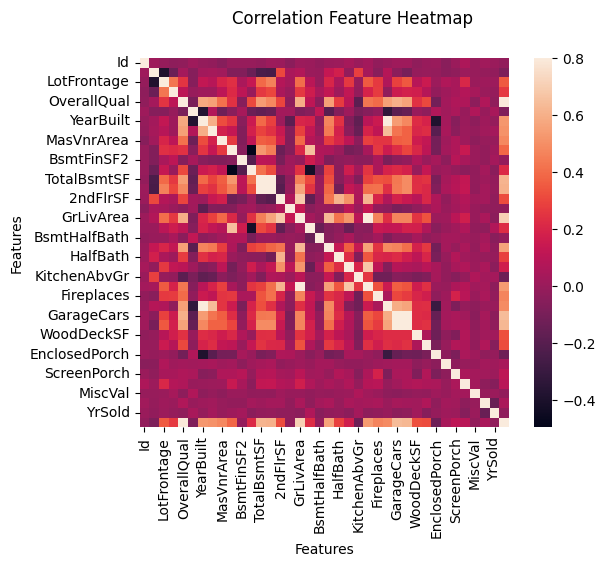

In [ ]:
corr_mat=df_train.corr()
f,ax=plt.subplots()
sns.heatmap(corr_mat,vmax=0.8,square=True)
plt.suptitle("Correlation Feature Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")


<ipython-input-11-a08d6676d86b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat=df_train.corr()


Text(99.74999999999999, 0.5, 'Features')

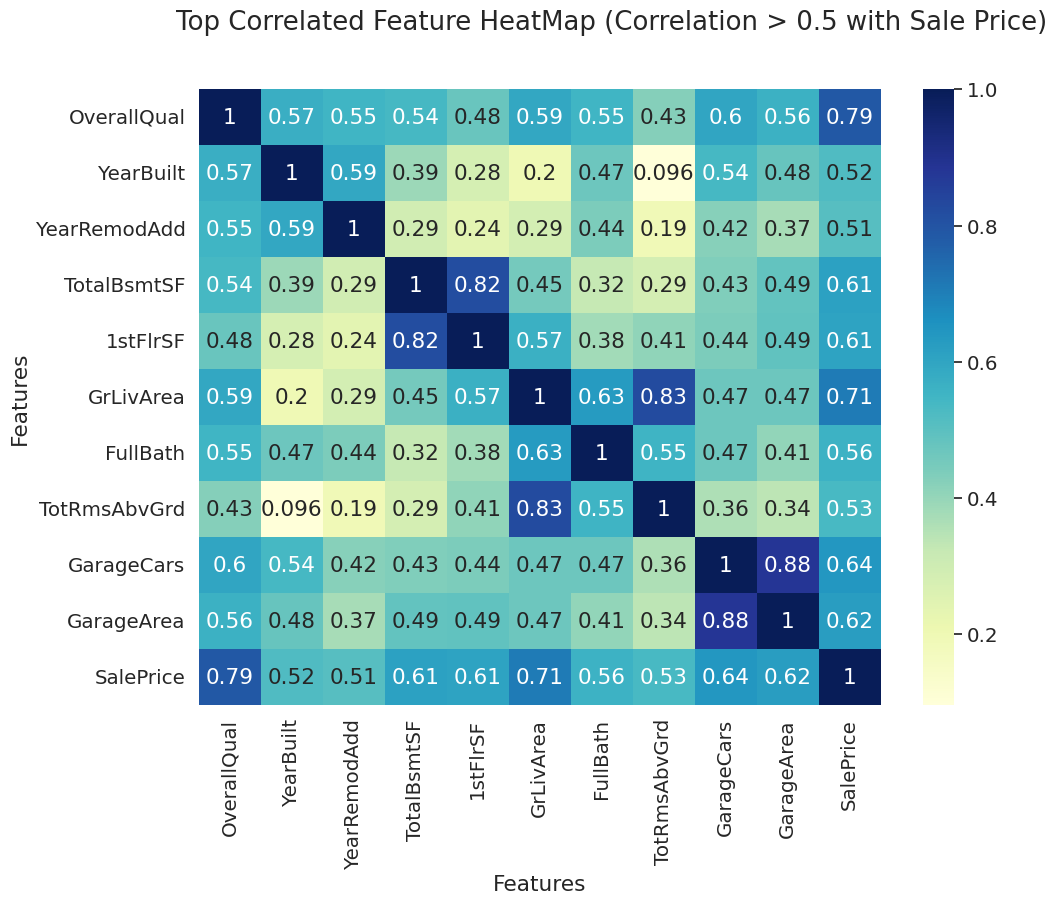

In [ ]:
corr_mat=df_train.corr()
sns.set(font_scale=1.3)
plt.figure(figsize=(11,8))

top_corr=corr_mat.index[abs(corr_mat["SalePrice"])>0.5]
g=sns.heatmap(df_train[top_corr].corr(),annot=True,cmap="YlGnBu")
plt.suptitle("Top Correlated Feature HeatMap (Correlation > 0.5 with Sale Price)")
plt.xlabel("Features")
plt.ylabel("Features")

In [ ]:
print("Correlation values")

corr=df_train.corr().drop('SalePrice')
corr.sort_values(["SalePrice"],ascending=False,inplace=True)
print(corr.SalePrice)

Correlation values
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dt

<ipython-input-12-3b35bb037ca7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df_train.corr().drop('SalePrice')


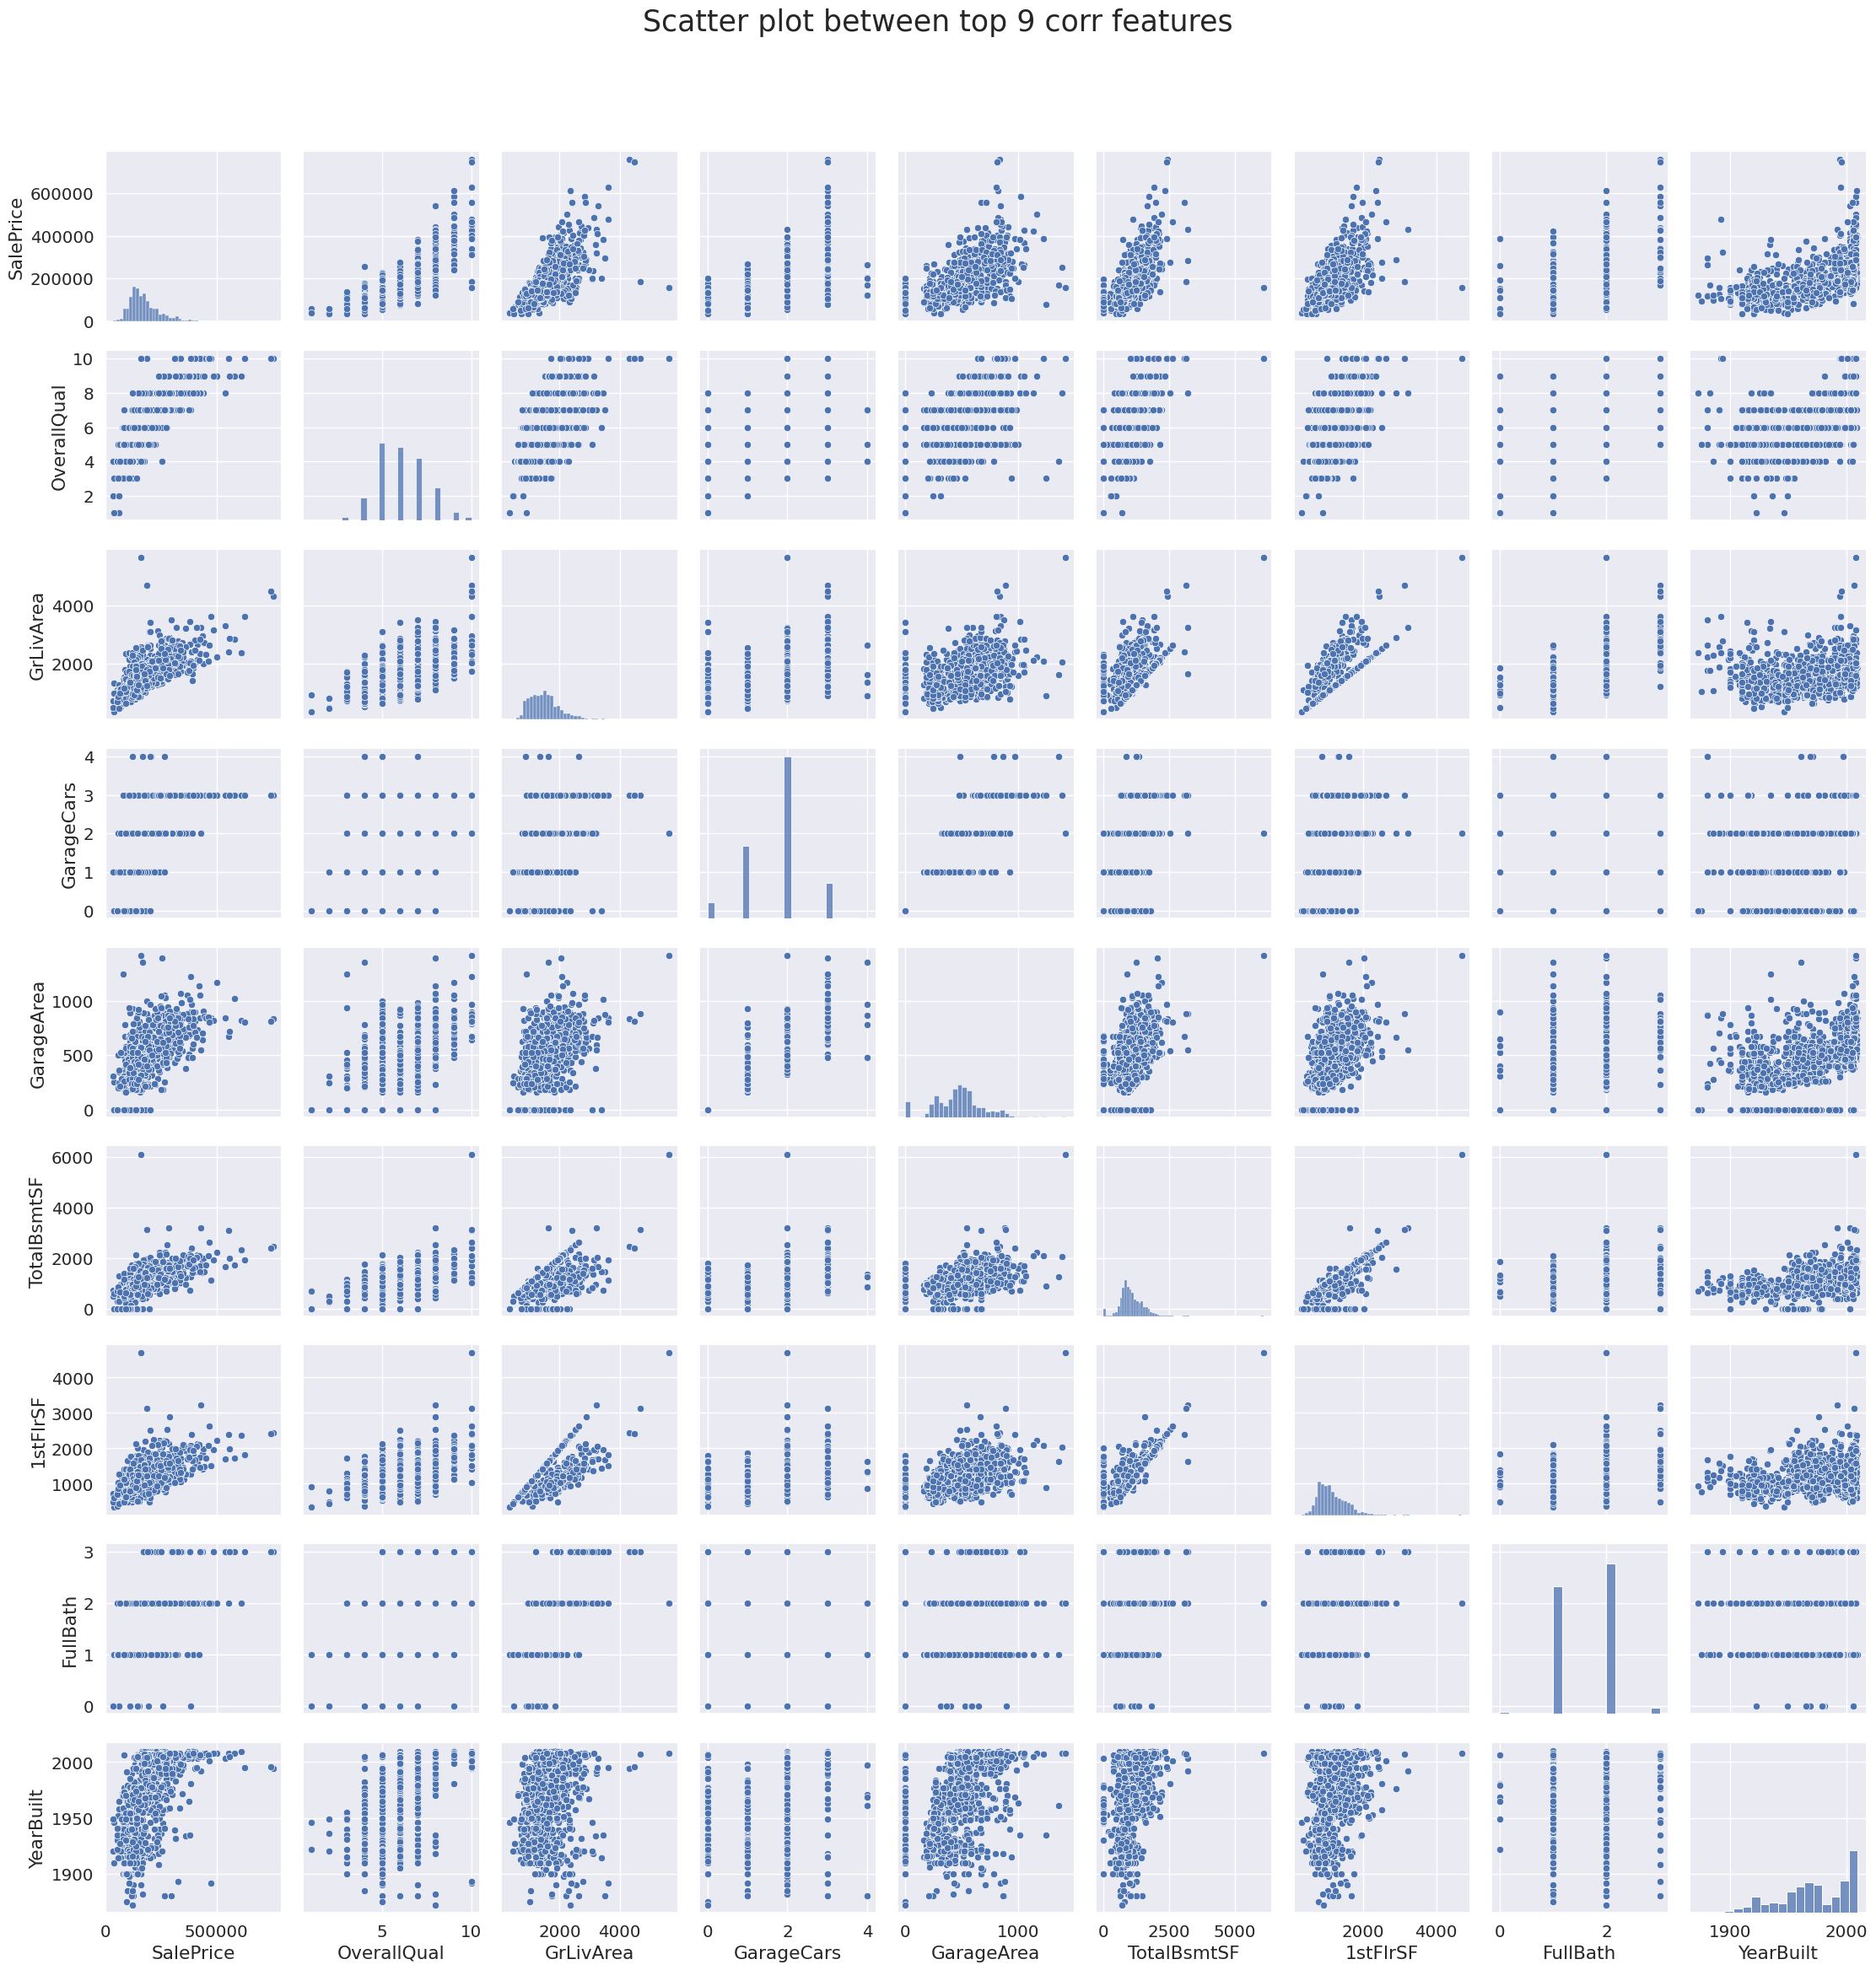

In [ ]:
rcParams['figure.figsize']=5,5
cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea', 'TotalBsmtSF','1stFlrSF','FullBath','YearBuilt']
sns_plot=sns.pairplot(df_train[cols])
plt.suptitle('Scatter plot between top 9 corr features',y=1.04,size=25)
plt.tight_layout()
plt.show()

Handling Data

In [ ]:
df_train.drop(['Id'],axis=1,inplace=True)
df_test.drop(['Id'],axis=1,inplace=True)

df_train.shape,df_test.shape

((1460, 80), (1459, 79))

In [ ]:
sns.set_style('whitegrid')
edgecolor='black'

fig=plt.figure(figsize=(12,12))

def scatter_plot(a):
  fig,ax=plt.subplots()
  ax.scatter(x=df_train[a],y=df_train['SalePrice'],edgecolor=edgecolor)
  plt.ylabel('SalePrice', fontsize=12)
  plt.xlabel(a, fontsize=12)
  plt.suptitle("Scatter Plot of "+ a + " and SalePrice")
  plt.show()



<Figure size 1200x1200 with 0 Axes>

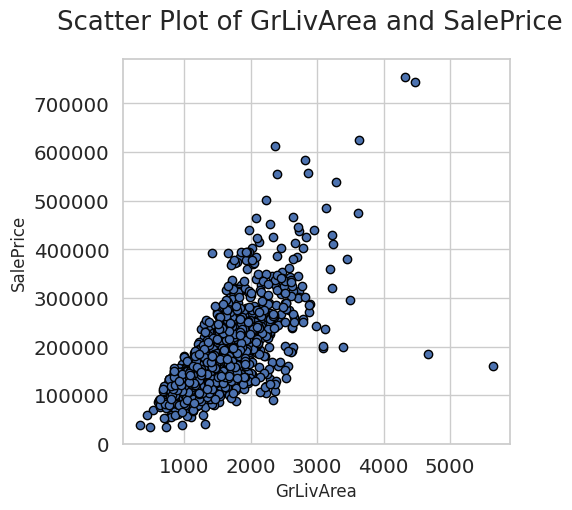

In [ ]:
scatter_plot('GrLivArea')

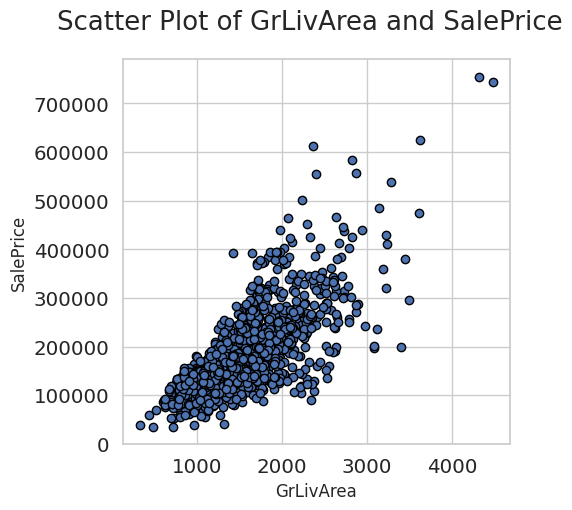

In [ ]:
df_train=df_train.drop(df_train[(df_train['GrLivArea']>4000)&(df_train['SalePrice']<300000)].index)


#Check the graphic again
scatter_plot('GrLivArea')

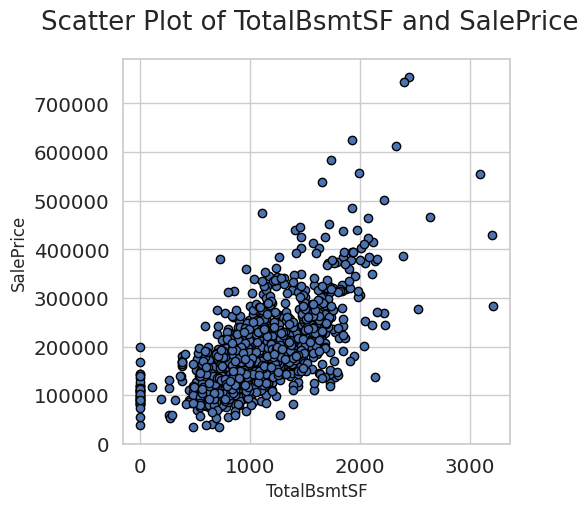

In [ ]:
scatter_plot('TotalBsmtSF')

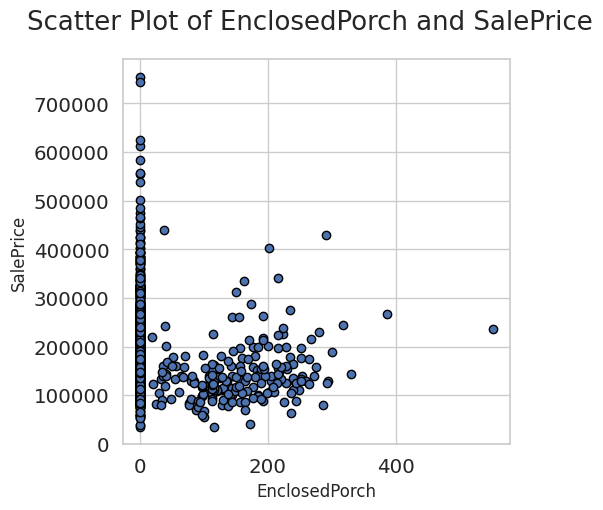

In [ ]:
scatter_plot('EnclosedPorch')

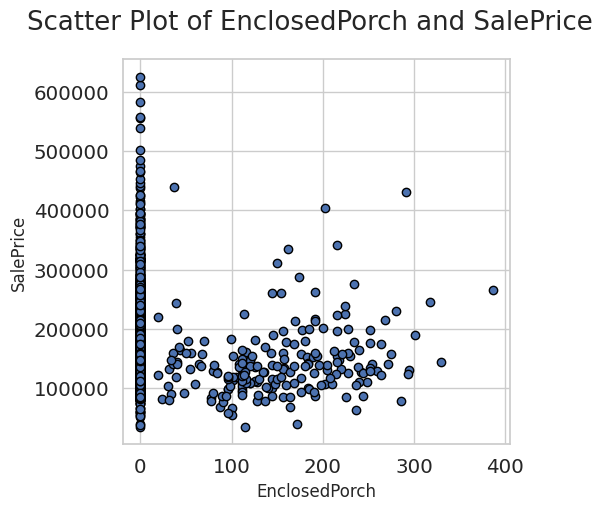

In [ ]:


df_train=df_train.drop(df_train[(df_train['EnclosedPorch']>400)].index)
df_train=df_train.drop(df_train[(df_train['SalePrice']>700000)].index)

scatter_plot('EnclosedPorch')

In [ ]:
fig=plt.figure(figsize=(7,7))

<Figure size 700x700 with 0 Axes>

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

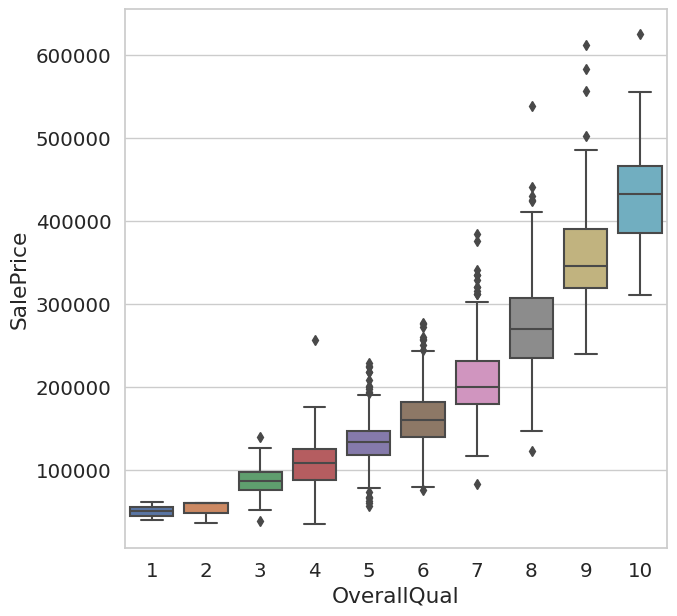

In [ ]:
# plot a box plot for categorical feature : Overall Quality

fig=plt.figure(figsize=(7,7))
data=pd.concat([df_train['SalePrice'],df_train['OverallQual']],axis=1)
sns.boxplot(x=df_train['OverallQual'],y="SalePrice",data=data)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

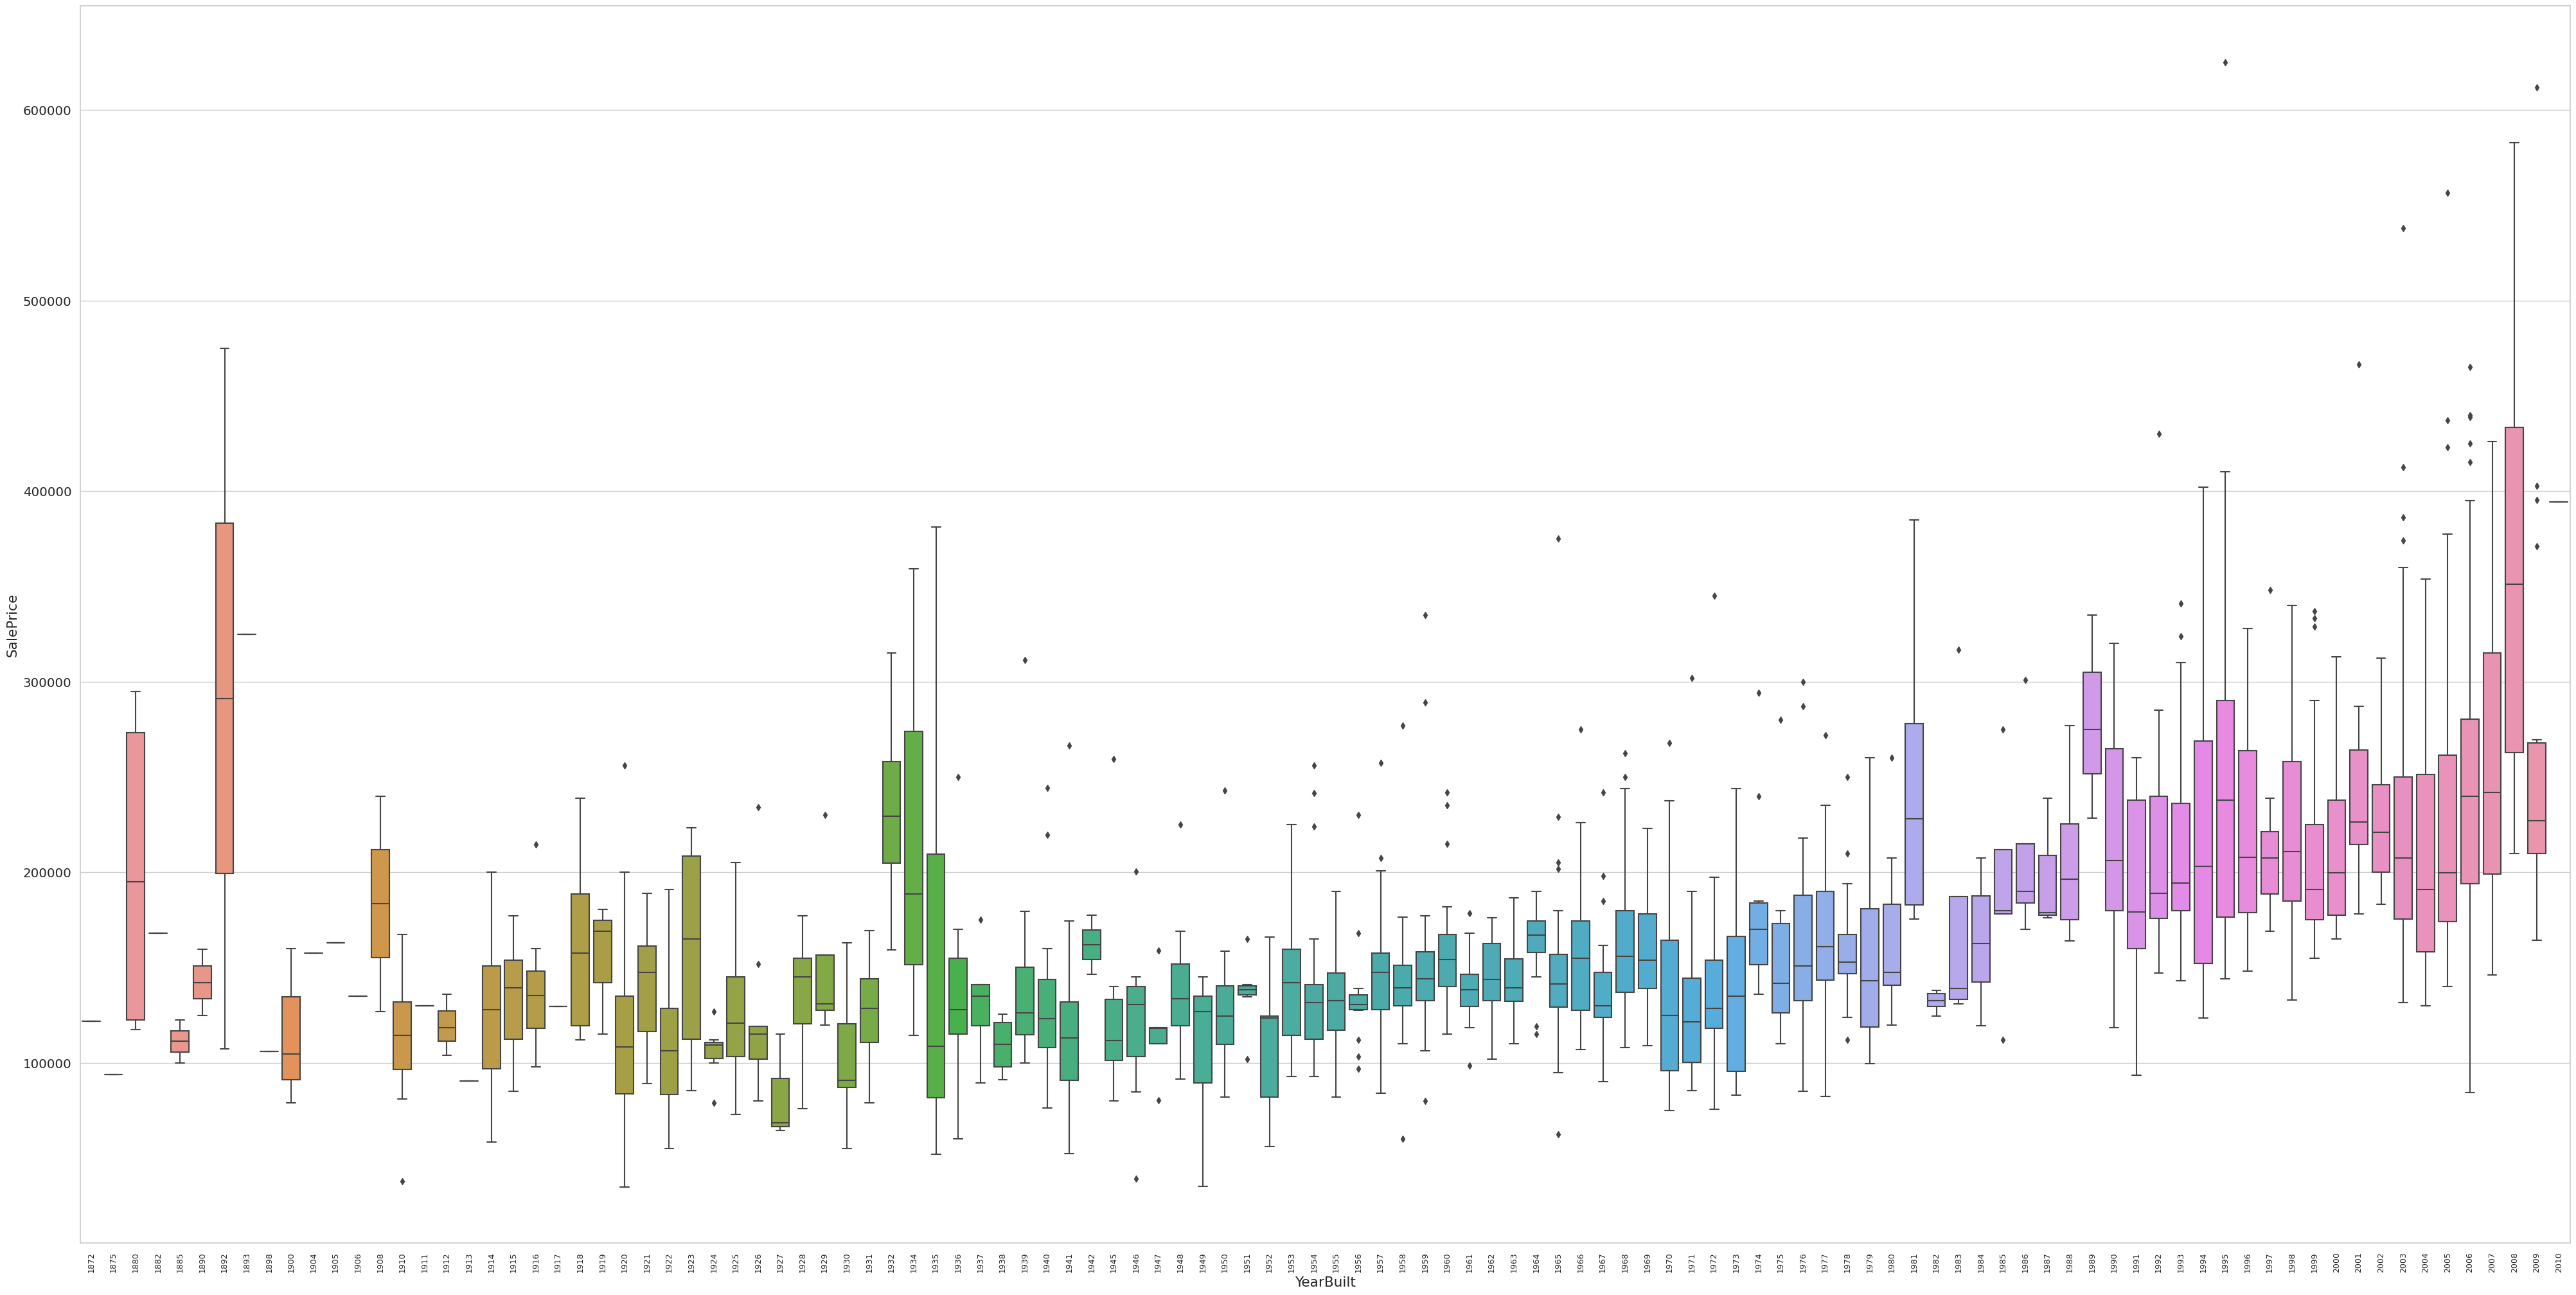

In [ ]:
# plot a box plot for categorical feature : Year Built
fig=plt.figure(figsize=(50,25))
data=pd.concat([df_train['SalePrice'],df_train['YearBuilt']],axis=1)
sns.boxplot(x=df_train['YearBuilt'],y="SalePrice",data=data)
plt.xticks(rotation=90,fontsize=9)

<ipython-input-24-b2ceda9b7b41>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'])


Skewness: 1.567473
Kurtosis: 3.888317


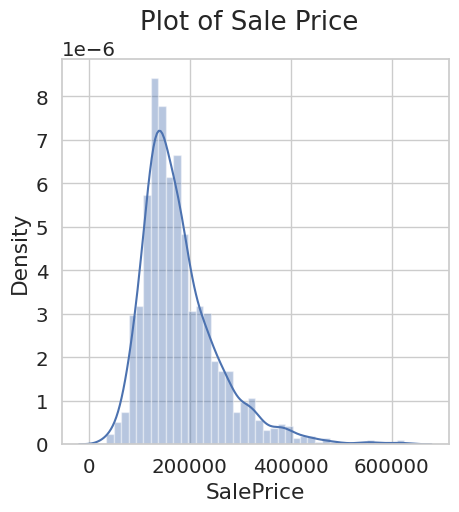

In [ ]:
sns.distplot(df_train['SalePrice'])

plt.suptitle( "Plot of Sale Price")

print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

<ipython-input-25-69a46ffa6294>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'])


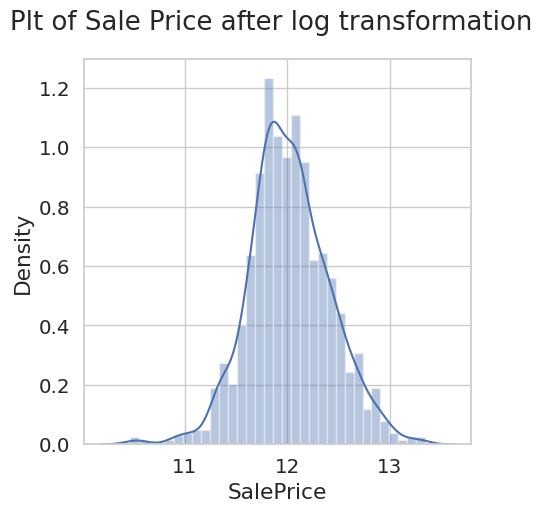

Skewness: 0.066821
Kurtosis: 0.667522


In [ ]:
df_train['SalePrice']=np.log(df_train['SalePrice'])
plt.suptitle("Plt of Sale Price after log transformation")
sns.distplot(df_train['SalePrice'])
plt.show()
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

In [ ]:
df_train['SalePrice'].describe()

count    1455.000000
mean       12.021706
std         0.396112
min        10.460242
25%        11.774520
50%        12.001505
75%        12.272562
max        13.345507
Name: SalePrice, dtype: float64

In [ ]:
df_train['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1455, dtype: float64

In [ ]:
df_train.shape

(1455, 80)

In [ ]:
def missing_data(df,n):
  total=df.isna().sum().sort_values(ascending=False)
  percentage=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
  n_unique=df.nunique()
  missing_data=pd.concat([total,percentage,n_unique],axis=1,keys=['Total No of missing val','% of missing val','Number of unique vals'],sort=False)

  print(missing_data.head(n))

In [ ]:
missing_data(df_train,20)

              Total No of missing val  % of missing val  Number of unique vals
PoolQC                           1451          0.997251                      2
MiscFeature                      1401          0.962887                      4
Alley                            1364          0.937457                      2
Fence                            1176          0.808247                      4
FireplaceQu                       690          0.474227                      5
LotFrontage                       259          0.178007                    109
GarageYrBlt                        81          0.055670                     97
GarageCond                         81          0.055670                      5
GarageType                         81          0.055670                      6
GarageFinish                       81          0.055670                      3
GarageQual                         81          0.055670                      5
BsmtExposure                       38          0.026

In [ ]:
df_train.drop(['PoolQC'],axis=1,inplace=True)

In [ ]:
df_train.drop(['Utilities'],axis=1,inplace=True)

In [ ]:
df_train.drop(['MiscFeature','Alley'],axis=1,inplace=True)

In [ ]:
df_test.drop(['PoolQC'],axis=1,inplace=True)
df_test.drop(['Utilities'],axis=1,inplace=True)
df_test.drop(['MiscFeature','Alley'],axis=1,inplace=True)

In [ ]:
missing_data(df_train,24)

              Total No of missing val  % of missing val  Number of unique vals
Fence                            1176          0.808247                      4
FireplaceQu                       690          0.474227                      5
LotFrontage                       259          0.178007                    109
GarageYrBlt                        81          0.055670                     97
GarageFinish                       81          0.055670                      3
GarageQual                         81          0.055670                      5
GarageCond                         81          0.055670                      5
GarageType                         81          0.055670                      6
BsmtFinType2                       38          0.026117                      6
BsmtExposure                       38          0.026117                      4
BsmtCond                           37          0.025430                      4
BsmtFinType1                       37          0.025

In [ ]:
# calculate total number of null values in training data
null_train = df_train.isnull().sum().sum()
print(null_train)

# calculate total number of null values in test data
null_test = df_test.isnull().sum().sum()
print(null_test)

2734
2782


In [ ]:
# save the 'SalePrice'column as train_label
train_label = df_train['SalePrice'].reset_index(drop=True)

# # drop 'SalePrice' column from df_train
df_train = df_train.drop(['SalePrice'], axis=1)
# # now df_train contains all training features

In [ ]:
df_train['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [ ]:
df_train['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79.,  99.,  67.,
        83.,  43., 103., 174.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106.,  42.,  39., 104., 144.,
       114., 128., 149., 313., 168., 182., 138., 152., 124., 153.,  46.])

In [ ]:
df_train['LotFrontage'].describe()

count    1196.000000
mean       69.606187
std        22.865726
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [ ]:
#df_train['Functional'].unique()
df_test['Functional'].isnull().sum()

2

In [ ]:
#df_train['KitchenQual'].unique()
#df_test['KitchenQual'].isnull().sum()
df_test['KitchenQual'].mode()[0]

'TA'

In [ ]:
#df_train['Electrical'].unique()
df_train['Electrical'].mode()[0]

'SBrkr'

In [ ]:
df_train['SaleType'].mode()[0]

'WD'

In [ ]:
df_train['Exterior1st'].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [ ]:
#df_train['MSSubClass'].unique()
df_test['MSSubClass'].isnull().sum()

0

In [ ]:
def missing(df):
  #df = df.drop(['Utilities','PoolQC','MiscFeature','Alley'], axis=1)
  df["Fence"]=df["Fence"].fillna("None")

  df["FireplaceQu"]=df["FireplaceQu"].fillna("None")
  df["LotFrontage"]=df["LotFrontage"].fillna(df["LotFrontage"].median())
  df["Functional"]=df["Functional"].fillna("Typ")
  df["KitchenQual"]=df["KitchenQual"].fillna(df["KitchenQual"].mode()[0])
  df["Electrical"]=df["Electrical"].fillna(df["Electrical"].mode()[0])
  df["SaleType"]=df["SaleType"].fillna(df["SaleType"].mode()[0])
  df["MasVnrType"] = df["MasVnrType"].fillna("None") #so fill as "None" (since categorical feature)
  df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
  df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
  df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
  df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
  df['MSSubClass'] = df['MSSubClass'].fillna("None")

  for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')
  for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)
  for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)
  for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')

  return df


In [ ]:
df_train = missing(df_train)
df_test = missing(df_test)

In [ ]:
# calculate total number of null values in training data
null_train = df_train.isnull().sum().sum()
print(null_train)

# calculate total number of null values in test data
null_test = df_test.isnull().sum().sum()
print(null_test)

0
0


In [ ]:
df_train.shape,df_test.shape

((1455, 75), (1459, 75))

In [ ]:
def add_nwe_cols(df):
  df['Total_Sf']=df['TotalBsmtSF']+df['1stFlrSF']+df['2ndFlrSF']
  df['Total_Bathrooms']=(df['FullBath']+(0.5*df['HalfBath'])+df['BsmtFullBath']+(0.5*df['BsmtHalfBath']))
  df['Total_Porch_SF']=(df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] +
                            df['ScreenPorch'] + df['WoodDeckSF'])
  df['Total_Square_Feet'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])
  df['Total_Quality'] = df['OverallQual'] + df['OverallCond']
  return df

In [ ]:
df_train = add_nwe_cols(df_train)
df_test = add_nwe_cols(df_test)

In [ ]:
df_train.shape,df_test.shape

((1455, 80), (1459, 80))

In [ ]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchS

In [ ]:
df_test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchS

In [ ]:
g1 = df_train.columns.to_series().groupby(df_train.dtypes).groups

In [ ]:
{k.name: v for k, v in g1.items()}

{'int64': Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
        '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
        'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'MiscVal', 'MoSold', 'YrSold', 'Total_Sf', 'Total_Porch_SF',
        'Total_Square_Feet', 'Total_Quality'],
       dtype='object'),
 'float64': Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'Total_Bathrooms'], dtype='object'),
 'object': Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
        'MasVnrType', 'ExterQual', 'ExterCon

In [ ]:
g2 = df_test.columns.to_series().groupby(df_test.dtypes).groups

In [ ]:
{k.name: v for k, v in g2.items()}

{'int64': Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
        'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
        'Total_Porch_SF', 'Total_Quality'],
       dtype='object'),
 'float64': Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
        'GarageCars', 'GarageArea', 'Total_Sf', 'Total_Bathrooms',
        'Total_Square_Feet'],
       dtype='object'),
 'object': Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
        'MasVnrType', 'ExterQ

In [ ]:
df_train=pd.get_dummies(df_train)
df_test=pd.get_dummies(df_test)

print(df_train.shape)
print(df_test.shape)

(1455, 292)
(1459, 278)


In [ ]:
df_train,df_test=df_train.align(df_test,join='inner',axis=1)

In [ ]:
df_train.shape,df_test.shape

((1455, 278), (1459, 278))

In [ ]:
# calculate total number of null values in training data
null_train = df_train.isnull().sum().sum()
print(null_train)

# calculate total number of null values in test data
null_test = df_test.isnull().sum().sum()
print(null_test)

0
0


In [ ]:
df_train.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
df_test.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 1459
Columns: 278 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(37), uint8(237)
memory usage: 814.2 KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 278 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(14), int64(27), uint8(237)
memory usage: 805.1 KB


In [ ]:
X_test=df_test

In [ ]:
X_test.shape

(1459, 278)

In [ ]:
df_train["SalePrice"]=train_label

In [ ]:
train_set,valid_set=train_test_split(df_train,train_size=0.7,shuffle=False)
X_train=train_set.drop(["SalePrice"],axis=1)
Y_train=train_set["SalePrice"].copy()
X_val=valid_set.drop(["SalePrice"],axis=1)
Y_val=valid_set["SalePrice"].copy()

In [ ]:
print("The shape of X_train is {}".format(X_train.shape))
print("The shape of Y_train is {}".format(Y_train.shape))
print("The shape of X_val is {}".format(X_val.shape))
print("The shape of Y_val is {}".format(Y_val.shape))
print("The shape of X_test is {}".format(X_test.shape))

The shape of X_train is (1018, 278)
The shape of Y_train is (1018,)
The shape of X_val is (437, 278)
The shape of Y_val is (437,)
The shape of X_test is (1459, 278)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018 entries, 0 to 1020
Columns: 278 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(37), uint8(237)
memory usage: 569.6 KB


In [ ]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437 entries, 1021 to 1459
Columns: 278 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(37), uint8(237)
memory usage: 244.5 KB


In [ ]:
Y_train

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1016    12.271345
1017    12.078239
1018    12.175613
1019    11.373663
1020    12.160029
Name: SalePrice, Length: 1018, dtype: float64

In [ ]:
Y_val

1021    12.567237
1022    11.630709
1023    12.028739
1024    12.588191
1025    11.561716
          ...    
1455          NaN
1456          NaN
1457          NaN
1458          NaN
1459          NaN
Name: SalePrice, Length: 437, dtype: float64

In [ ]:
null_t_x = X_train.isnull().sum().sum()
print(null_t_x)

null_t_y = Y_train.isnull().sum().sum()
print(null_t_y)

null_v_x = X_val.isnull().sum().sum()
print(null_v_x)

null_v_y = Y_val.isnull().sum().sum()
print(null_v_y)

0
0
0
5


In [ ]:
np.where(np.isnan(Y_val))

(array([432, 433, 434, 435, 436]),)

In [ ]:
Y_val=np.nan_to_num(Y_val,nan=np.nanmean(Y_val))

In [ ]:
np.where(np.isnan(Y_val))

(array([], dtype=int64),)

In [ ]:
X_val.shape,Y_val.shape

((437, 278), (437,))

Cross Validation that can be used to reduce underfitting and overfitting

In [ ]:
def cross_validation(model):
  scores=np.sqrt(-cross_val_score(model,X_train,Y_train,cv=12,scoring="neg_mean_squared_error"))
  mean=np.mean(scores)
  print("Mean CV score: ",mean)

In [ ]:
def rmse(Y_pred,Y_train):
  rmse_ = np.sqrt(metrics.mean_squared_error(Y_train,Y_pred))
  print("rmse:",rmse_)

In [ ]:
def comp_ac_vs_pred(y_train,y_pred):
  fig=plt.figure(figsize=(12,12))
  fig, ax=plt.subplots()
  ax.scatter(y_train, y_pred,color = "teal",edgecolor = 'lightblue')
  ax.plot([y_train.min(),y_train.max()], [y_train.min(), y_train.max()], 'k--',lw=0.2)
  ax.set_xlabel('Actual')
  ax.set_ylabel('Predicted')
  plt.suptitle("Actual vs Predicted Scatter Plot",size=14)
  plt.show()

In [ ]:
reg=linear_model.LinearRegression()
cross_validation(reg)

Mean CV score:  0.4752199075398334


In [ ]:
#fitting the data for training
reg_model=reg.fit(X_train,Y_train)

#prediction based on training data
y_pred=reg.predict(X_train)

rmse(y_pred,Y_train)

rmse: 0.3442710335666392


<Figure size 1200x1200 with 0 Axes>

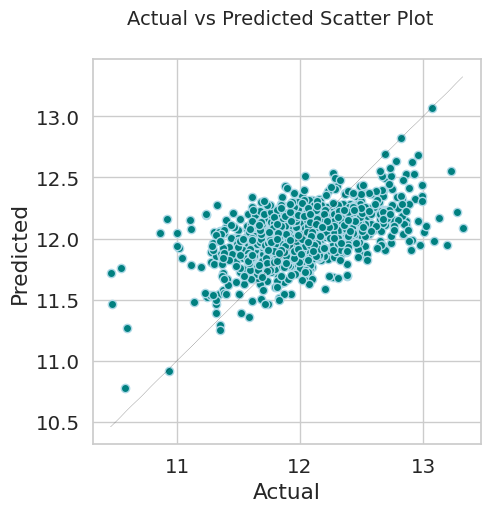

In [ ]:
comp_ac_vs_pred(Y_train,y_pred)

In [ ]:
#predict sale price on val set

y_pred_val=reg.predict(X_val)

rmse(y_pred_val,Y_val)

rmse: 0.4279348039715641


<Figure size 1200x1200 with 0 Axes>

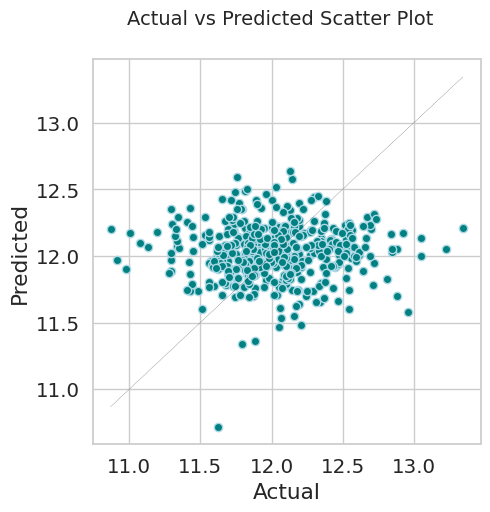

In [ ]:
comp_ac_vs_pred(Y_val,y_pred_val)

RIDGE MODEL

The second model used is Ridge Regression. Ridge Regression is a regularized version of linear regression. The parameter alpha is used to regularize the model. For alpha equal to zero, ridge regression is just a linear regression. RidgeCV model is used to implement ridge regression as it has a built-in cross validation of the alpha parameter. Sixteen different values of alpha between 7e-4 and 20 were used with a 10-fold cross validation. A pipeline using min-max scaler was built to apply to training, validation and testing data.

In [ ]:
# to find the best value of alphas from this list, i will use RidgeCV
alphas_ = [ 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20]

# use robust scaler as unlike other scalers, the centering and scaling of ro bust scaler
#is based on percentiles and are therefore is not influenced by a few number of very large marginal outliers.

ridge = make_pipeline(MinMaxScaler(), linear_model.RidgeCV(alphas = alphas_, cv = 10))

In [ ]:
cross_validation(ridge)

Mean CV score:  0.4167270749625922


In [ ]:
#fit
modelRidge=ridge.fit(X_train,Y_train)
y2_pred=ridge.predict(X_train)
rmse(y2_pred,Y_train)




rmse: 0.36727237018186476


In [ ]:
y2_pred_v=ridge.predict(X_val)
rmse(y2_pred_v,Y_val)

rmse: 0.3957886167433281


<Figure size 1200x1200 with 0 Axes>

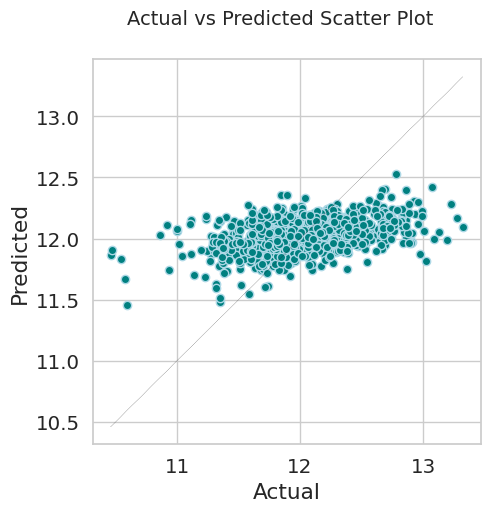

In [ ]:
comp_ac_vs_pred(Y_train,y2_pred)

<Figure size 1200x1200 with 0 Axes>

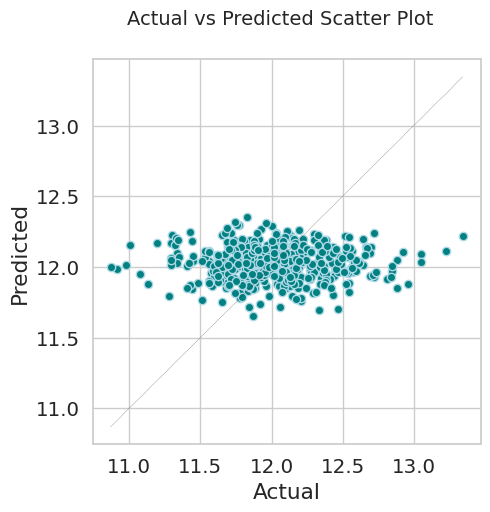

In [ ]:
comp_ac_vs_pred(Y_val,y2_pred_v)

Lasso Model

This model is also an optimized version of a linear regresseion model which also perform feature selection and can also select sparse coefficients
For lasso model LassoCV model is used because it has built in cross validation of the alpha parameter.

In [ ]:
alpha2=[0.0001, 0.0002, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]

lasso=make_pipeline(RobustScaler(),linear_model.LassoCV(alphas=alpha2, random_state=42, cv=12, max_iter=2000))

In [ ]:
cross_validation(lasso)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.473625751885969, tolerance: 0.014062005916392917
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.641409756903826, tolerance: 0.01388682924653013
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.42589468005687, tolerance: 0.014074783611391048
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: Conv

Mean CV score:  0.4297643272515321


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.2831069626873, tolerance: 0.014059197139630457
  model = cd_fast.enet_coordinate_descent_gram(


In [ ]:
#fit
model_lasso = lasso.fit(X_train, Y_train)

#predict value of quality on the training set
y3_pred = lasso.predict(X_train)

#caculate root mean square error
rmse(y3_pred,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.69179974177614, tolerance: 0.015151270252779393
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.92416287557782, tolerance: 0.015366965177081287
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.119175819450525, tolerance: 0.015214986226185617
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: Conv

rmse: 0.36267996691815335


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.03106342082043, tolerance: 0.015372083714337646
  model = cd_fast.enet_coordinate_descent_gram(


In [ ]:
y3_pred_v=lasso.predict(X_val)

rmse(y3_pred_v,Y_val)

rmse: 0.4059493256188701


<Figure size 1200x1200 with 0 Axes>

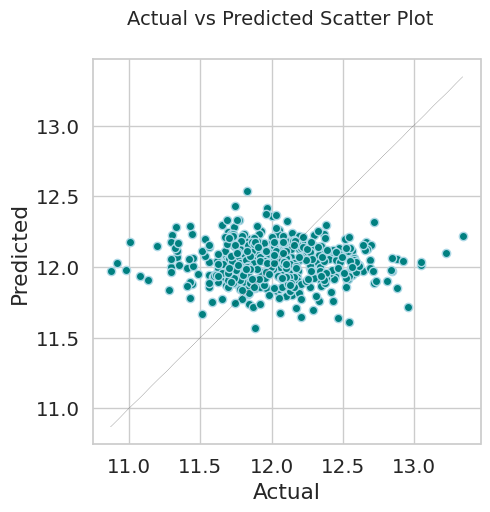

In [ ]:
comp_ac_vs_pred(Y_val,y3_pred_v)

<Figure size 1200x1200 with 0 Axes>

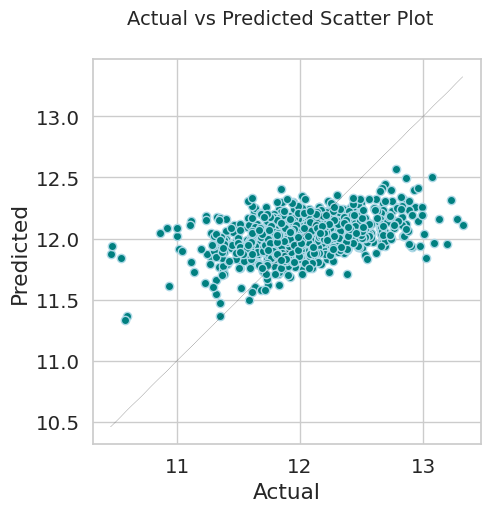

In [ ]:
comp_ac_vs_pred(Y_train,y3_pred)

K_NEAREST NEIGHBOUR MODEL

This model is also commonly used . First k is found using hyper parameter tuning and the it finds the kth nearset neighbours of the selected point . Either euclodian or manhattan distances between neighbours is calculated to find nearest neighbours.When nearest naighbours are found , therir average is taken to predict the value in the case of regression . In the case of classification, class having maximum neighbours is selected .This model is sensitive to lots of data, outliers and missing values and perform poorly under such conditions

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

neigh=KNeighborsRegressor(n_neighbors = 5,
                            weights = 'uniform',
                            algorithm = 'auto',
                            leaf_size=25)
neigh.fit(X_train,Y_train)
y4_pred = neigh.predict(X_train)
rmse(y4_pred,Y_train)

rmse: 0.34885424380933583


In [ ]:
# N = 7 #
neigh1 = KNeighborsRegressor(n_neighbors = 7,
                             weights = 'uniform',
                             leaf_size=25)
neigh1.fit(X_train,Y_train)

#predict value of quality on the training set
y_pred = neigh1.predict(X_train)

#caculate root mean square error
rmse(y_pred,Y_train)

rmse: 0.3665712393534244


In [ ]:
# N = 9 #
neigh2 = KNeighborsRegressor(n_neighbors = 9,
                             weights = 'uniform',
                             leaf_size=25)
neigh2.fit(X_train,Y_train)

#predict value of quality on the training set
y_pred = neigh2.predict(X_train)

#caculate root mean square error
rmse(y_pred,Y_train)

rmse: 0.37262338937265044


The performance at k=5 is best as when we are increasing the value of k, the rmse is also increasing which indicates poor performance

In [ ]:
#predict value of sale price on the validation set
y4_pred_v = neigh.predict(X_val)

#caculate root mean square error
rmse(y4_pred_v, Y_val)

rmse: 0.41351487769327555


<Figure size 1200x1200 with 0 Axes>

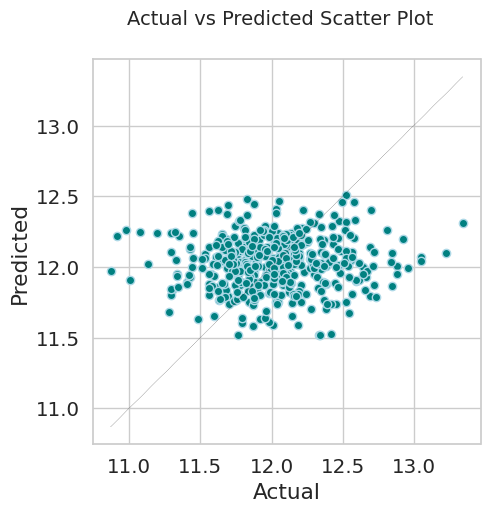

In [ ]:
comp_ac_vs_pred(Y_val,y4_pred_v)

<Figure size 1200x1200 with 0 Axes>

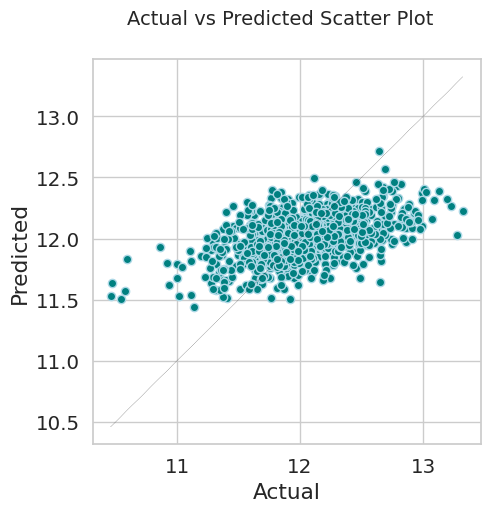

In [ ]:
comp_ac_vs_pred(Y_train,y4_pred)

Now we will be using the famous decision tree model and using it is considered a better approach because it doesnt require much cleaning and it alo deals with outliers in a better way.This tree uses entropy to make decisions.More the value of entropy in its range(0-1), more purity the leaf node has and decision is clearer.

In [ ]:
from sklearn import tree

In [ ]:
tree_regr1=tree.DecisionTreeRegressor(max_depth=7,min_samples_leaf=5,random_state=42)

tree_regr2=tree.DecisionTreeRegressor(max_depth=9,min_samples_leaf=9,random_state=42)

tree_regr1=tree_regr1.fit(X_train,Y_train)
tree_regr12 = tree_regr2.fit(X_train,Y_train)

y1=tree_regr1.predict(X_train)
y2=tree_regr2.predict(X_train)


In [ ]:
cross_validation(tree_regr1)
cross_validation(tree_regr2)

Mean CV score:  0.4440722344760503
Mean CV score:  0.45825272349446555


In [ ]:
rmse(y1,Y_train)
rmse(y2,Y_train)

rmse: 0.3238501847516405
rmse: 0.319434991726199


In [ ]:
y5_pred_v=tree_regr2.predict(X_val)
rmse(y5_pred_v,Y_val)

rmse: 0.4583579345988703


<Figure size 1200x1200 with 0 Axes>

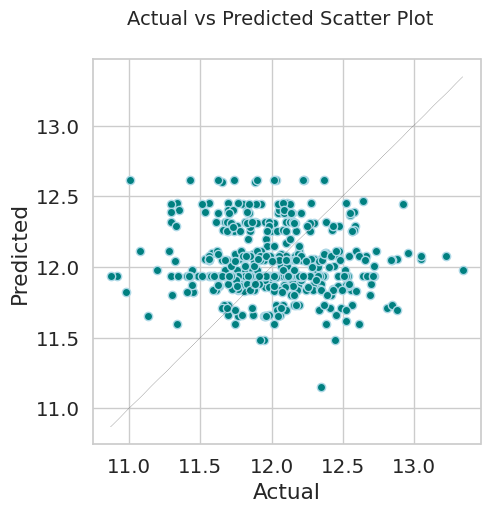

In [ ]:
comp_ac_vs_pred(Y_val,y5_pred_v)

<Figure size 1200x1200 with 0 Axes>

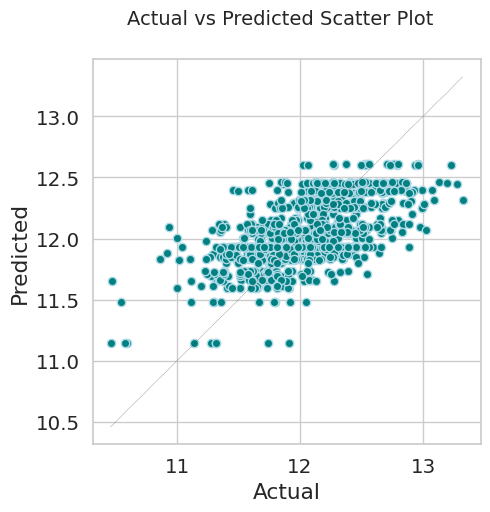

In [ ]:
comp_ac_vs_pred(Y_train,y2)

Now we will be using random forest which uses ensemble modeling to predict an outcome
First a boot strap data set is generated using random rows of the original data set . Same tuple can be used repeatedly. Then subsets of the new data set are fed into multiple decision trees and each of which give a certain output. The output having maximum probability is selected.

In [ ]:
rforest = RandomForestRegressor(n_estimators=200,max_depth=13,random_state=42)

In [ ]:
# grid search to find best value of C, gamma and epsilon
param_grid  = {'n_estimators': [100,150,200,250,300,350,400],
               'max_depth': [5,7,9,11,13,15,17],
               'min_samples_leaf': [3,5,7,9,11,13,15]}

# set cross validation to 5
clf = GridSearchCV(rforest, param_grid, cv = 5, n_jobs = -2)
clf.fit(X_train,Y_train)

KeyboardInterrupt: ignored

In [ ]:
clf.best_params_

AttributeError: ignored

In [ ]:
rforest = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_leaf=3, random_state=42)

In [ ]:
cross_validation(rforest)

Mean CV score:  0.403804172243945


In [ ]:
#fit
model_rforest = rforest.fit(X_train, Y_train)

#predict value of sale price on the training set
y6_pred = rforest.predict(X_train)

#caculate root mean square error
rmse(y6_pred,Y_train)

rmse: 0.3494772667130121


In [ ]:
#predict value of sale price on the validation set
y6_pred_v = rforest.predict(X_val)

#caculate root mean square error
rmse(y6_pred_v, Y_val)

rmse: 0.38616747296757176


<Figure size 1200x1200 with 0 Axes>

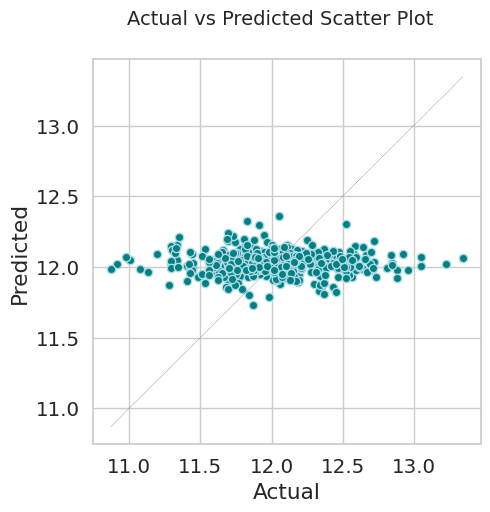

In [ ]:
comp_ac_vs_pred(Y_val,y6_pred_v)

<Figure size 1200x1200 with 0 Axes>

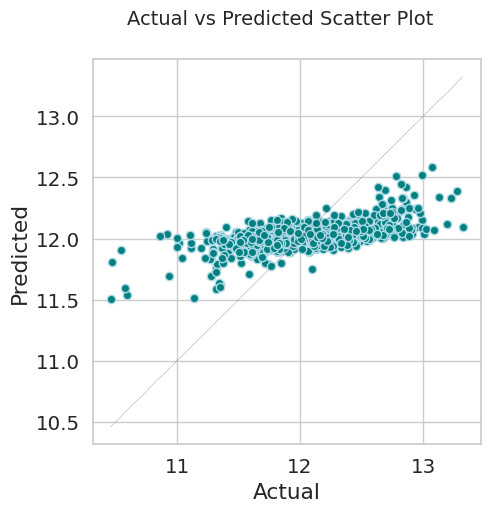

In [ ]:
comp_ac_vs_pred(Y_train,y6_pred)

Now we will use SUPPORT REGRESSOR MODEL for prediction . In support regression two marginal planes are build in such a way that cost function is minimum . For support vector regression ,cost fuction which needs to be minimized is ||w||/2+C{(j=1-k) eeta.
In this formula w is the vector representation of w . C is the number of misclassifiers that can be tolerated and appropriate c is choosen using hyper parameter tuning.eeta is basically the summation of a distance between misclassified point and its marginal plane. The constraint in support vector regression is
|Yi-WiXiT|<eeta + |eetaI|

In [ ]:
svr_basic = SVR(C = 10, gamma = 0.001)

In [ ]:
# grid search to find best value of C, gamma and epsilon and default kernel 'rbf'
param_grid  = {'C': [5,7,10,15,20,30],'gamma': [0.001, 0.0001, 0.0011, 0.00011], 'epsilon': [0.1, 0.01, 0.001, 0.005, 0.007, 0.008, 0.009] }

# set cross validation to 5
clf = GridSearchCV(svr_basic, param_grid, cv = 10, n_jobs = -2)
clf.fit(X_train,Y_train)

KeyboardInterrupt: ignored

In [ ]:
clf.best_params_

In [ ]:
#make final SVR model with best parameters found from grid search
svr = make_pipeline(MinMaxScaler(), SVR(C= 5, epsilon= 0.1, gamma=0.0011, kernel = "sigmoid"))

In [ ]:
cross_validation(svr)

Mean CV score:  0.40963206887105647


In [ ]:
#fit
model_svr = svr.fit(X_train, Y_train)

#predict value of sale price on the training set
y7_pred = svr.predict(X_train)

#caculate root mean square error
rmse(y7_pred,Y_train)

rmse: 0.382458785153154


In [ ]:
#predict value of sale price on the validation set
y7_pred_v = svr.predict(X_val)

#caculate root mean square error
rmse(y7_pred_v, Y_val)

rmse: 0.3900469727418293


<Figure size 1200x1200 with 0 Axes>

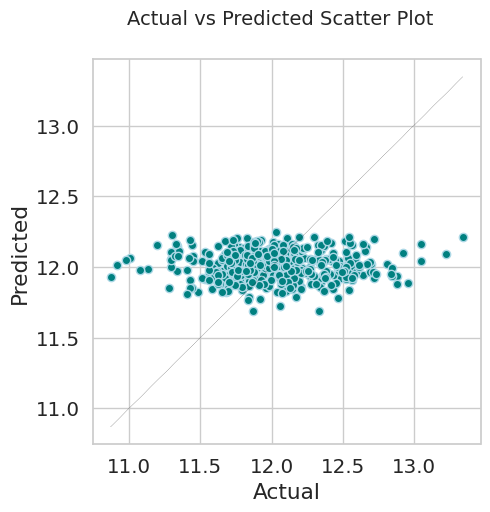

In [ ]:
comp_ac_vs_pred(Y_val,y7_pred_v)

<Figure size 1200x1200 with 0 Axes>

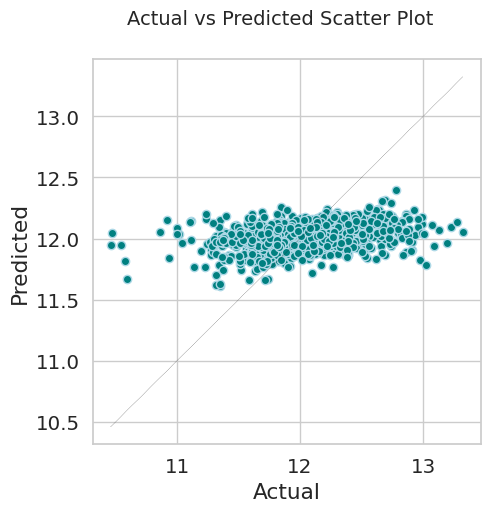

In [ ]:
comp_ac_vs_pred(Y_train,y7_pred)

GRADIENT BOOSTING REGRESSOR MODEL
Now we will create a boosting regressor model which works in the following ways
the base model basically calculates (y1-y^)+(y2-y^)+...+(yn=y^) which is then subtracted by the dependent variable. Based on that and other independent variables, decision trees predict the resudual error in a series and the collection of such decision trees are used to predict the final value.

In [ ]:
# set max depth to 4, min_samples_leaf to 15
gbr1 = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth = 7,
                                min_samples_leaf=7, loss='huber', random_state =42)

In [ ]:
# set max depth to 7, min_samples_leaf to 10
gbr2 = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth = 9,
                                min_samples_leaf=10, loss='huber', random_state =42)

In [ ]:
cross_validation(gbr1)
cross_validation(gbr2)

Mean CV score:  0.4287974195276836
Mean CV score:  0.4292489907640939


In [ ]:
#fit
model_gbr1 = gbr1.fit(X_train, Y_train)
model_gbr2 = gbr2.fit(X_train, Y_train)

#predict value of sale price on the training set
y_g1_pred = gbr1.predict(X_train)
y_g2_pred = gbr2.predict(X_train)

#caculate root mean square error
rmse(y_g1_pred,Y_train)
rmse(y_g2_pred,Y_train)

rmse: 0.15045439854847656
rmse: 0.13917493901563793


In [ ]:
#predict value of sale price on the validation set
y8_pred_v = gbr2.predict(X_val)

#caculate root mean square error
rmse(y8_pred_v, Y_val)

rmse: 0.4118219430457788


<Figure size 1200x1200 with 0 Axes>

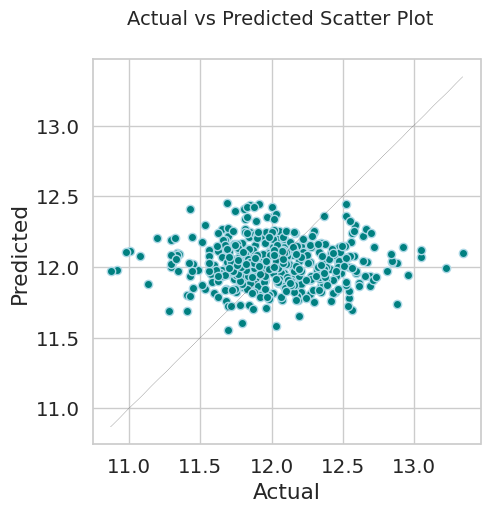

In [ ]:
comp_ac_vs_pred(Y_val,y8_pred_v)

<Figure size 1200x1200 with 0 Axes>

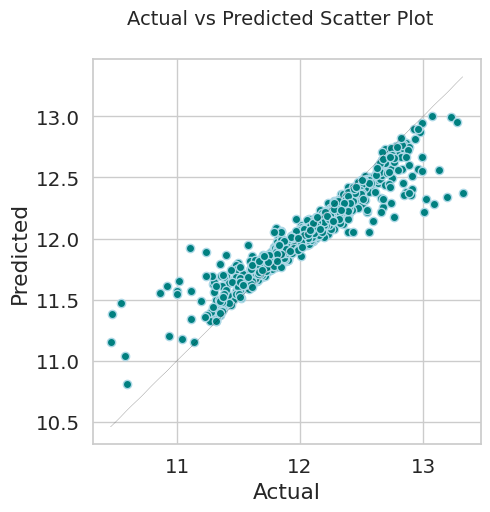

In [ ]:
comp_ac_vs_pred(Y_train,y_g1_pred)

In [ ]:
# using Random Forest,Support Vector Regressor and Gradient Boosting to build a stack model because they have lower RMSE comparatively
estimators = [('Random Forest', rforest),
              ("Support Vector Regressor",svr),
              ("K",neigh),
              ("Ridge",ridge)
              ]

In [ ]:
stacked = StackingRegressor(estimators = estimators, final_estimator = rforest, cv=5)

In [ ]:
cross_validation(stacked)

Mean CV score:  0.4093903027876036


In [ ]:
#fit
model_stack = stacked.fit(X_train, Y_train)

#predict value of sale price on the training set
y9_pred = stacked.predict(X_train)

#caculate root mean square error
rmse(y9_pred,Y_train)

rmse: 0.40380119116088625


In [ ]:
#predict value of sale price on the validation set
y9_pred_v = stacked.predict(X_val)

#caculate root mean square error
rmse(y9_pred_v, Y_val)

rmse: 0.3769718491202983


<Figure size 1200x1200 with 0 Axes>

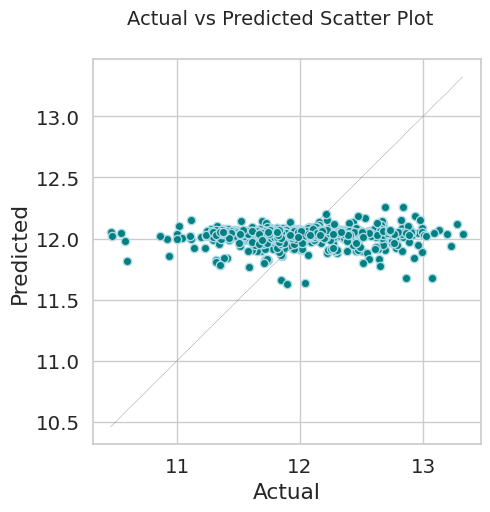

In [ ]:
comp_ac_vs_pred(Y_train,y9_pred)

<Figure size 1200x1200 with 0 Axes>

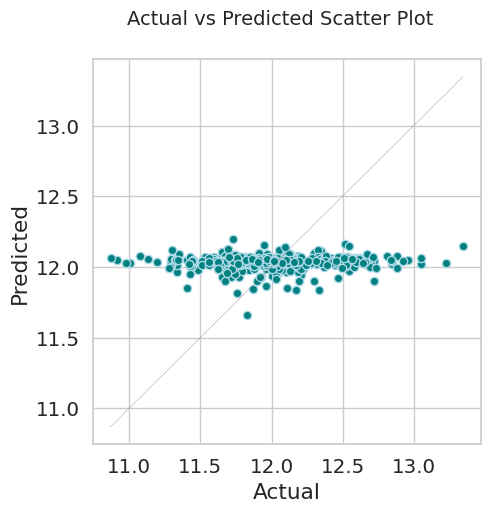

In [ ]:
comp_ac_vs_pred(Y_val,y9_pred_v)

ERROR COMPARISON
- The lowest error is of  : Stacked Regressor model  
- The largest error is of : decision tree(maxdepth=9)
- Therefore Stacked Regressor model will be applied to the test data as it is the best performing model